In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier


In [2]:
df=pd.read_csv('/content/drive/MyDrive/ExcelR/Assignment/Decision tree/Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'],drop_first=True)

In [5]:
df['TaxInc']=pd.cut(df['Taxable.Income'],bins=[1002,3000,99620],labels=["Risky","Good"])

In [6]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


In [7]:
df=pd.get_dummies(df,columns=['TaxInc'],drop_first=True)
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


In [8]:
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1


In [9]:
df.tail()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


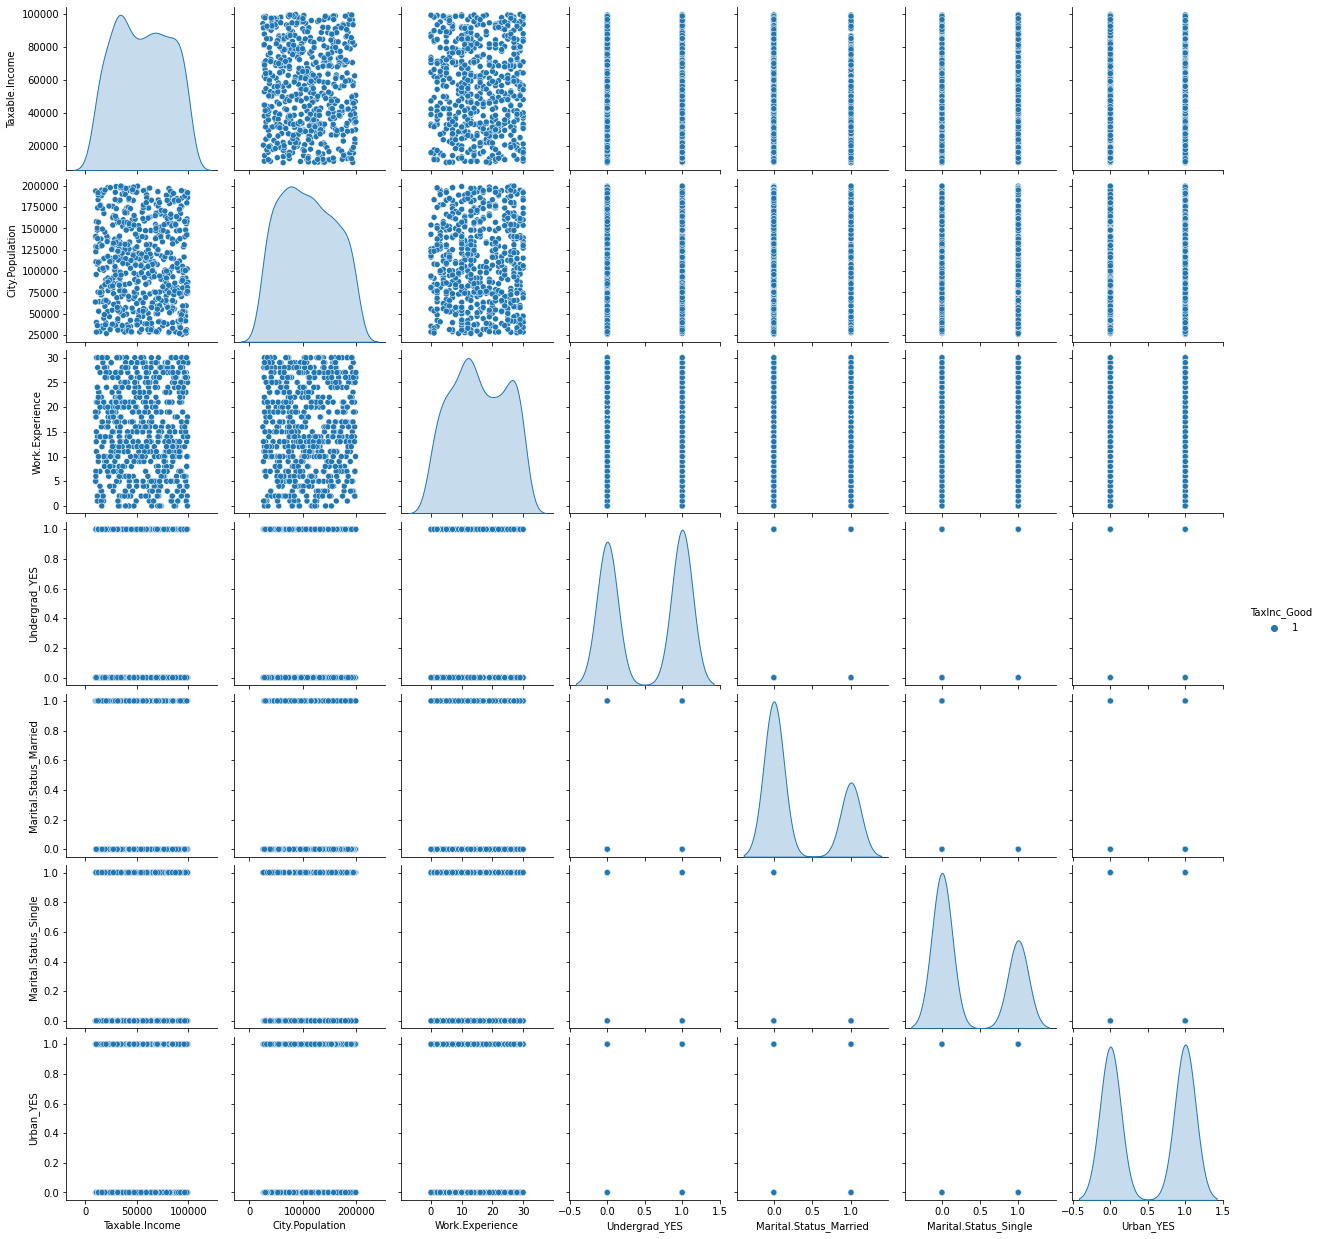

In [10]:
sns.pairplot(data=df,hue='TaxInc_Good')

In [11]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [12]:
df_norm=norm_func(df.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,NaN
591,0.615406,0.600000,1.0,0.0,1.0,1.0,NaN
592,0.283703,0.533333,1.0,0.0,1.0,0.0,NaN
593,0.610256,0.333333,0.0,0.0,0.0,1.0,NaN
594,0.412341,0.300000,0.0,1.0,0.0,1.0,NaN
595,0.078811,0.233333,1.0,0.0,0.0,1.0,NaN
596,0.170058,0.066667,1.0,0.0,0.0,1.0,NaN
597,0.737240,0.000000,0.0,0.0,0.0,1.0,NaN
598,0.886810,0.566667,1.0,1.0,0.0,0.0,NaN
599,0.760683,0.533333,0.0,0.0,0.0,0.0,NaN


In [13]:
df_norm=norm_func(df.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,NaN
591,0.615406,0.600000,1.0,0.0,1.0,1.0,NaN
592,0.283703,0.533333,1.0,0.0,1.0,0.0,NaN
593,0.610256,0.333333,0.0,0.0,0.0,1.0,NaN
594,0.412341,0.300000,0.0,1.0,0.0,1.0,NaN
595,0.078811,0.233333,1.0,0.0,0.0,1.0,NaN
596,0.170058,0.066667,1.0,0.0,0.0,1.0,NaN
597,0.737240,0.000000,0.0,0.0,0.0,1.0,NaN
598,0.886810,0.566667,1.0,1.0,0.0,0.0,NaN
599,0.760683,0.533333,0.0,0.0,0.0,0.0,NaN


In [14]:
X=df_norm.drop(['TaxInc_Good'],axis=1)
Y=df_norm["TaxInc_Good"]

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [16]:
df_norm["income"]="<=30000"
df_norm.loc[df["Taxable.Income"]>=30000,"income"]="Good"
df_norm.loc[df["Taxable.Income"]<=30000,"inxome"]="Risky"

In [17]:
df.drop(["Taxable.Income"],axis=1,inplace=True)

In [18]:
df.rename(columns={'Undergrad':'undergrad',
                   'Marital.Status':'marital',
                   'City.Population':'population',
                   'Work experience':'experience',
                   'Urban':'urban'}, inplace=True)


In [19]:
ls=preprocessing.LabelEncoder()
for column_name in df.columns:
    if  df[column_name].dtype==object:
         df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

In [20]:
features= df.iloc[:,0:5]
labels=df.iloc[:,5]

In [21]:
colnames=list(df.columns)
predictors=colnames[0:5]
target=colnames[5]

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(features,labels,test_size=0.2,stratify=labels)

In [23]:
from sklearn.ensemble import RandomForestClassifier as RF
model= RF(n_jobs=3,n_estimators=15,oob_score=True,criterion='entropy')
model.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [24]:
model.estimators_
model.classes_
model.n_features_
model.n_classes_

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2

In [25]:
model.n_outputs_


1

In [26]:
model.oob_score_

0.47291666666666665

In [27]:
prediction=model.predict(X_train)

In [31]:
accuracy=accuracy_score(Y_train,prediction)

In [32]:
np.mean(prediction==Y_train)


0.9916666666666667

In [35]:
confusion=confusion_matrix(Y_train,prediction)

In [36]:
pred_test=model.predict(X_test)

In [37]:
acc_test=accuracy_score(Y_test,pred_test)

In [38]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO

In [39]:
tree=model.estimators_[5]

In [40]:
dot_data=StringIO()
export_graphviz(tree,out_file=dot_data,filled=True,rounded=True,feature_names=predictors,class_names=target,impurity=False)

In [41]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

# **Building Decision Tree Classifier**

In [42]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

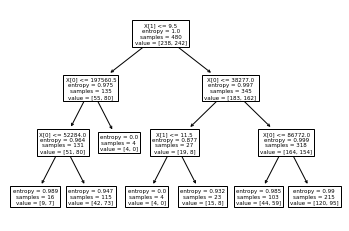

In [44]:
from sklearn import tree
tree.plot_tree(model);

In [45]:
colnames=list(df.columns)
colnames

['population',
 'Work.Experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

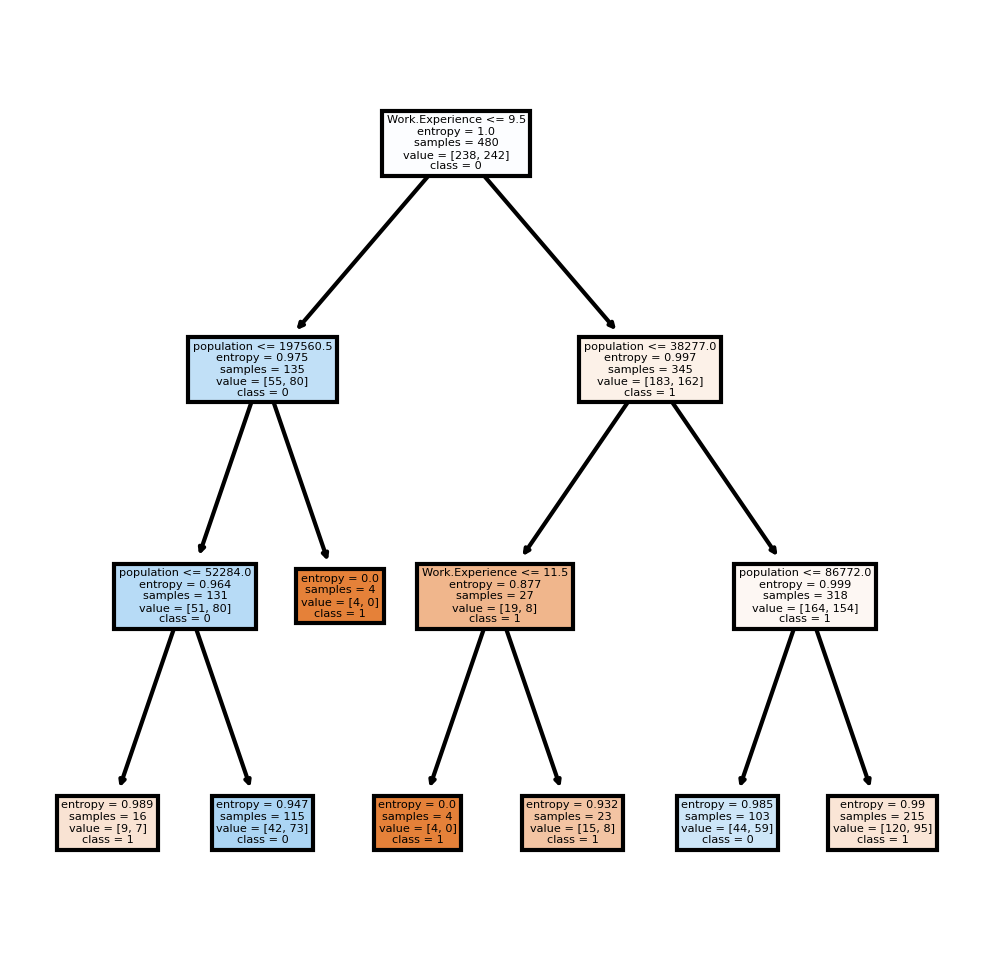

In [47]:
fn=['population',
 'Work.Experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']
cn=['1','0']
fig, axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [48]:
pred=model.predict(X_test)
pd.Series(pred).value_counts()

0    66
1    54
dtype: int64

In [50]:
pred

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0], dtype=uint8)

In [51]:
pd.crosstab(Y_test,pred)

col_0,0,1
Urban_YES,,
0,35,25
1,31,29


In [52]:
np.mean(pred==Y_test)

0.5333333333333333